In [17]:
library(tidyverse)

In [18]:
tweets_Startup <- read_csv("../input/24-thousand-tweets-later/tweets.csv")
tweets_trolls  <- read_csv("../input/russian-troll-tweets/tweets.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  tweet_id = col_double(),
  created_at = col_datetime(format = ""),
  tweet = col_character(),
  retweets = col_double(),
  username = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  user_id = col_double(),
  user_key = col_character(),
  created_at = col_double(),
  created_str = col_datetime(format = ""),
  retweet_count = col_double(),
  retweeted = col_logical(),
  favorite_count = col_double(),
  text = col_character(),
  tweet_id = col_double(),
  source = col_character(),
  hashtags = col_character(),
  expanded_urls = col_character(),
  posted = col_character(),
  mentions = col_character(),
  retweeted_status_id = col_double(),
  in_reply_to_status_id = col_double()
)




In [19]:
tweets_with_emoji <- tweets_trolls$text[grepl('[\U{1F300}-\U{1F6FF}]', tweets_trolls$text)]

In [20]:
#length of the emoji in the tweets in russian troll tweets
(length((tweets_with_emoji))/length(tweets_trolls$text))*100

[1] 4.418573

In [21]:
tweets_with_emoji_startup <- tweets_Startup$tweet[grepl('[\U{1F300}-\U{1F6FF}]', tweets_Startup$tweet)]

In [22]:
#length of the emoji in the tweets in 24 thousand tweets
(length(tweets_with_emoji_startup)/length(tweets_Startup$tweet))*100

[1] 3.144427

In [23]:
#regulating expression to remove the modifier on various emojis
skin_tone <- '[\U{1F3FB}-\U{1F3FF}]' # SKIN TONE
hair_color <- '[\U{1F9B0}-\U{1F9B3}]' # HAIR COLOR 


In [24]:
# inorder to extract the emojis from the tweet 
extract_emoji_spans <- function(text_vector,length=T){
    emoji_vector <-str_extract_all(text_vector,'[\U{1F300}-\U{1F6FF}]+')      %>%
 # + symbol is used to return one or more thing %>% is the pipe operator 
 # emoji_vector will extract the emoji with the help of unicode mentioned above
        unlist()
    # unstacking the emojis
 # converting into tribble(Tibbles are data.frames that are lazy and surly)   
    emoji_dataframe <- tibble(emoji = emoji_vector)
   
   # adding length if required
    if(length==T){
            emoji_dataframe <- emoji_dataframe       %>%
          # Mutate Function in R (mutate, mutate_all and mutate_at) is used to create new variable or column to the dataframe in R  
               mutate(emoji_no_mods=str_replace_all(emoji,skin_tone,"")) %>% # removing and replacing skin tone modifier
                mutate(emoji_no_mods=str_replace_all(emoji_no_mods,hair_color,"")) %>%  # removing and replacing hair color modifier
                mutate(length=(str_length(emoji_no_mods)) )   %>%
                arrange(-length)
}
return(emoji_dataframe)
    }

In [25]:
# testing the working of the function extract emoji with a preestimated  output 
tweets_trolls$text[50:75]

[1] "RT @bob_owens: Looks like an attempt to gauge LEO response... and they got none until after the incident.\r\n\r\nLovely. https://t.co/6O7W89X7ls"    
 [2] "RT @Wook316: Watch plenty of Krampus movies #ToDoListBeforeChristmas"                                                                                
 [3] "RT @NBLmusicSalerno: #2017trendsreport Follow Mio Paisan @SleepSkee #Excellent @Twitter @LoveQuotes #RT #UrgentAction WE Love REAL TALK @sc…"        
 [4] "One of the best live performances ever http://t.co/CwL4r6DTwL"                                                                                       
 [5] "Kanzlerin, die von dem Volk gewählt wurde! #Merkel #Deutschland https://t.co/jxcJAkmLPf"                                                             
 [6] "RT @BenjaminEnfield: J. Cole Grants Wish For Young Fan With Cancer https://t.co/OjTuGWukwW"                                                          
 [7] "RT @IsraelandStufff: Teenage #Palestinian #Arab #terrorist gets 12 years in prison for attempted murder in #Jerusalem stabbing\r\n\r\nAhmad... ht…"  
 [8] "Deceitful Media caught on act when trying to drive the \"Donald Trump is racist\" rhetoric. \n\n#BlacksForTrump https://t.co/czKOvbfkVQ"             
 [9] "RT @ustatruck: [https://t.co/3xwuVXwwbK]\r\n\"Get Your Affairs in Order! Stephen Hawking Says We Only Have 1000 Years!\"\r\nhttps://t.co/6ZfhFQwaG3…"
[10] "RT @Gumball55668882: DEMOCRATS,,WOMEN ,,BILL CLINTON HAS  ABUSED \nMANY WOMEN ,, ONLY TO BE PROTECTED BY HILLARY ,ATTACKING THOSE VICTIMS ht…"       
[11] "What the Hell, this isn't English. https://t.co/gAOEryrGm6"                                                                                          
[12] "RT @Conservatexian: New post: \"Cost to fix Michigan sinkhole estimated at more than $78M\" https://t.co/Qwg1ACiv29"                                 
[13] "RT @DinoAHudson1: @erreebus @juicekan @Pollyesther34 @andieiamwhoiam @JNighter @CaseyParksIt @Deborah61049061 \r\nYea! Put this in your pipe a…"     
[14] "RT @EmbraceTheJ: BURR! https://t.co/LDF3fnANUb"                                                                                                      
[15] "RT @Veteran4Trump: A picture you will never see on @CNN or @MSNBC #BlacksForTrump Thumbs up for Trump 👍#MakeAmericaGreatAgain #Blacks4Trump…"       
[16] "RT @FreeLabelNet: [FLMAG] @JonnyRay_Genius: \r\n\r\nShisui\r\n\r\nhttps://t.co/2vv5gg088j"                                                           
[17] "RT @thomassfl: Wikileaks E-Mails:  Hillary Clinton Blackmailed Bernie Sanders https://t.co/l9X32FegV6."                                              
[18] "Clinton’s VP Choice: More Harm Than Good https://t.co/iGnLChFHeP"                                                                                    
[19] "Hillary Clinton vows to fight, lead for all as she accepts ... https://t.co/R6VEQUlsA4 | https://t.co/1KPXto2HfW https://t.co/nB3hB1kBds"            
[20] "RT @Rammer_Jammer84: I don't know about Hilary Clinton having a body double but it's super weird that she came out by herself considering s…"        
[21] "I ALWAYS do like this)))) https://t.co/Zuy1VdSpc5"                                                                                                   
[22] "RT @kimberqueenb: #ValentinesDayIn3Words To quote Elaine Benes: Fake,Fake,Fake!!"                                                                    
[23] "Time to get your unemployed millennial asses off the couch and get a job!  \r\n#MakeAmericaGreatAgain https://t.co/JzP0KGxKIj"                       
[24] "@DcStarlord the game starts in 5 minutes"                                                                                                            
[25] "RT @divinerebel: WHAT?!? OMG, How could @ComedyCentral cancel @larrywilmore? It is the only news show I can't miss. Bad decision- Please RE…"        
[26] "Obama and the looney left want to take our guns away, bring hordes of radical Muslims #Guns4NY"

In [26]:
# expected is a thumb
extract_emoji_spans(tweets_trolls$text[50:75])

emoji,emoji_no_mods,length
<chr>,<chr>,<int>
👍,👍,1


In [27]:
 # spaning from the datasets
extract_span_startups <- extract_emoji_spans(tweets_Startup$tweet)
 extract_span_trolls <- extract_emoji_spans(tweets_trolls$text)

In [28]:
extract_span_startups # the analysis of 24 thousand tweets later

emoji,emoji_no_mods,length
<chr>,<chr>,<int>
🙌🙌🙌🙌🙌🙌🙌,🙌🙌🙌🙌🙌🙌🙌,7
👏🏾👏🏾👏🏾👏🏾👏🏾👏🏾,👏👏👏👏👏👏,6
🙌🏾🙌🏿🙌🙌🏻🙌🏼🙌🏽,🙌🙌🙌🙌🙌🙌,6
🙌🏾🙌🏻🙌🏼🙌🏽🙌🏿🙌,🙌🙌🙌🙌🙌🙌,6
🏆🏆🎉🎉🎉,🏆🏆🎉🎉🎉,5
🏆🎉💃🙌😎,🏆🎉💃🙌😎,5
🙌🏻🙌🏼🙌🏽🙌🏾🙌🏿,🙌🙌🙌🙌🙌,5
👇🏻👇🏼👇🏽👇🏾👇🏿,👇👇👇👇👇,5
👌🙌👏🙆,👌🙌👏🙆,4


In [29]:
extract_span_trolls  # the analysis of russian trolls tweets 

emoji,emoji_no_mods,length
<chr>,<chr>,<int>
🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥,🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥,97
🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥,🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥,92
😂😂😂😂😜😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂,😂😂😂😂😜😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂,79
😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😌😊😊😊😌😌😌,😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😌😊😊😊😌😌😌,45
💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩,💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩💩,40
😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂,😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂😭😂,37
🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥,🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥,33
👀👀👀👀💪💪💪💪💪💪💪💪💪💪👂👂👂👂👂👂👂👂👂👂👍👍👍👎👎👎👎👇,👀👀👀👀💪💪💪💪💪💪💪💪💪💪👂👂👂👂👂👂👂👂👂👂👍👍👍👎👎👎👎👇,32
😂😂😂😂👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽👋🏽,😂😂😂😂👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋👋,29


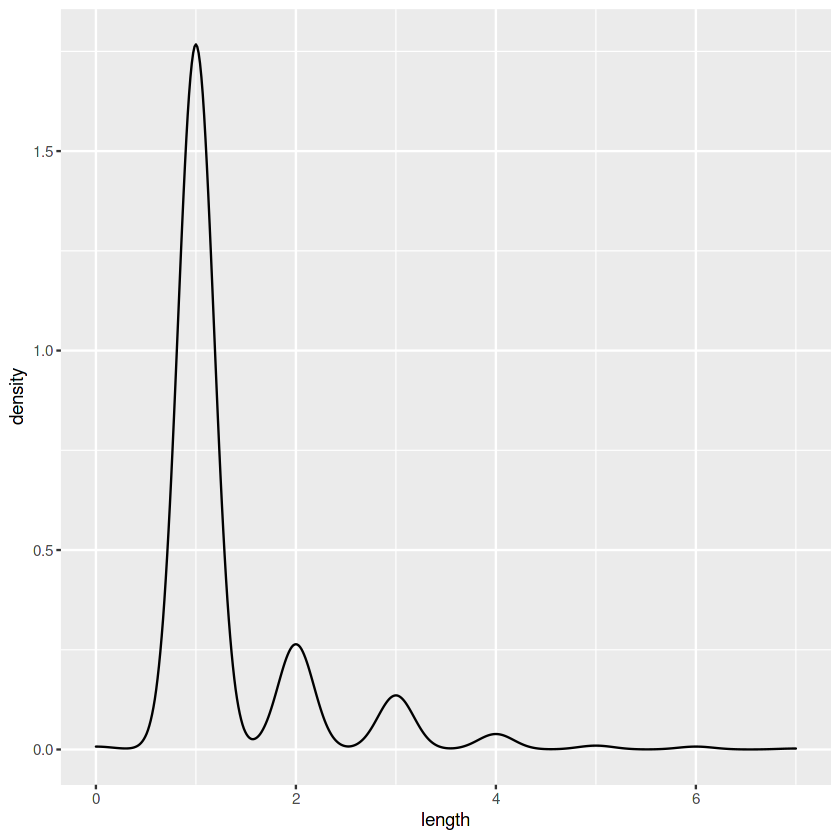

In [30]:
# visualizing the emoji anaysis length vs density of the tweet of 24 thousand tweets later
# ggplot is an open-source data visualization package for the statistical programming language R.

ggplot(extract_span_startups,aes(length)) +
geom_density()

Warning message:
“Removed 21 rows containing non-finite values (stat_density).”


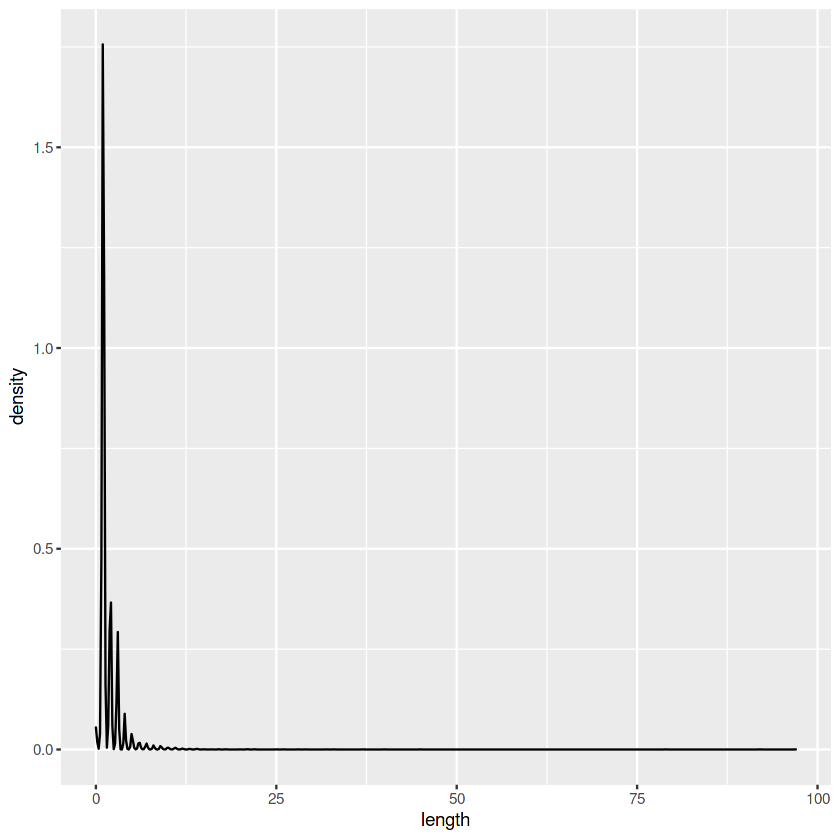

In [31]:
# visualizing the emoji anaysis length vs density of the tweet of russian troll tweets
ggplot(extract_span_trolls,aes(length)) +
geom_density()

In [32]:
# getting number of unique emojis in the span
str_count()
# first we have to extract all the emojis
extract_emoji_spans(text_vector, length=T)

ERROR: Error in stri_count_boundaries(string, opts_brkiter = opts(pattern)): argument "string" is missing, with no default


In [ ]:
# to get unique emojis
sum(!!(str_count(extract_span_startups$t ,length)))